In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
class LDA():
    def __init__(self, n_discriminants):
        self.n_discriminants= n_discriminants
        self.discriminants = None

    def fit(self, X, y):
        n_features = X.shape[1]
        class_labels = np.unique(y)

        mean_overall = np.mean(X, axis=0)
        S_W = np.zeros((n_features, n_features))
        S_B = np.zeros((n_features, n_features))

        for c in class_labels:
            X_c = X[y == c]
            mean_c = np.mean(X_c, axis=0)
            S_W += (X_c - mean_c).T.dot(X_c - mean_c)

            n_c = X_c.shape[0]
            mean_diff = (mean_c - mean_overall).reshape(n_features, 1)
            S_B += n_c * (mean_diff).dot(mean_diff.T)

        A = np.linalg.inv(S_W).dot(S_B)
        eigen_values, eigen_vectors = np.linalg.eig(A)
        eigen_vectors = eigen_vectors.T

        idxs = np.argsort(eigen_values)[::-1]
        eigen_vectors = eigen_vectors[idxs]
        self.discriminants = eigen_vectors[0: self.n_discriminants]

    def transform(self, X):
        return np.dot(X, self.discriminants.T)

In [3]:
iris = datasets.load_iris()
X, y = iris.data, iris.target

In [4]:
X.shape, y.shape

((150, 4), (150,))

In [5]:
lda = LDA(n_discriminants=2)
lda.fit(X, y)

In [6]:
X_proj = lda.transform(X)
X.shape, X_proj.shape

((150, 4), (150, 2))

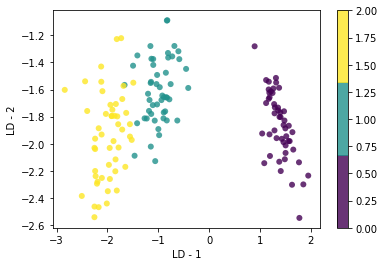

In [7]:
plt.scatter(X_proj[:, 0], X_proj[:, 1], c=y, edgecolor='none', alpha=0.8, cmap=plt.cm.get_cmap('viridis', 3))
plt.xlabel("LD - 1")
plt.ylabel("LD - 2")
plt.colorbar()
plt.show()